# Template matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

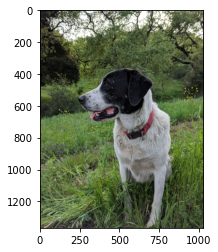

In [3]:
plt.imshow(full)

In [6]:
full.shape

(1367, 1025, 3)

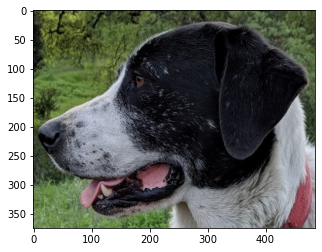

In [5]:
face = cv2.imread('Data/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
myfunc = eval('sum') # eveluates the string 'sum' and checks to see if the function sum exists

In [9]:
myfunc([1,2,3])

6

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

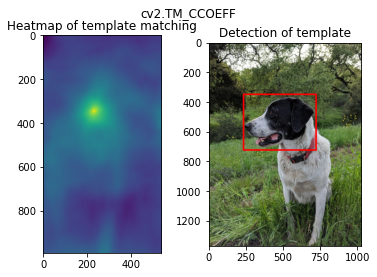

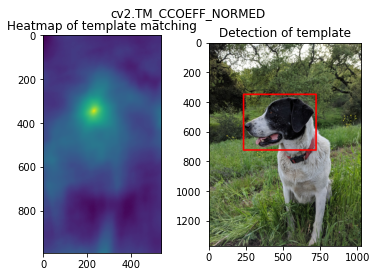

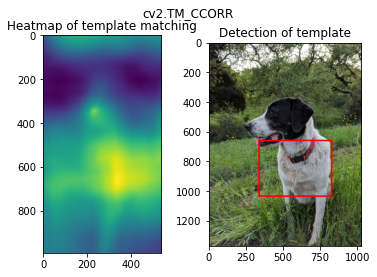

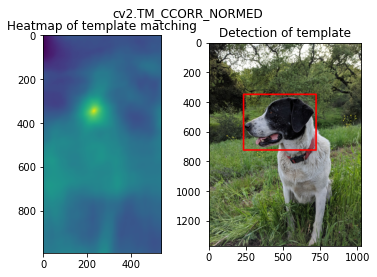

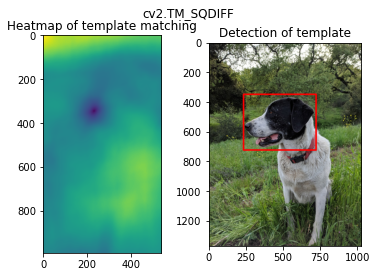

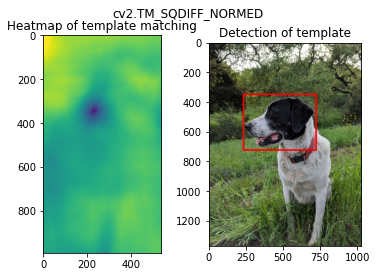

In [13]:
for m in methods:
    # create a copy of full image
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    # plot and show image
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show() # to be able to see the subplots in each m
    
    print('\n')
    print('\n')

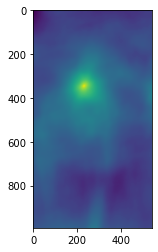

In [10]:
# let's see how template matching result looks like
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)
plt.imshow(res) # brightest point corresponds to top left corner of face

# Corner detection

## Harris corner detection

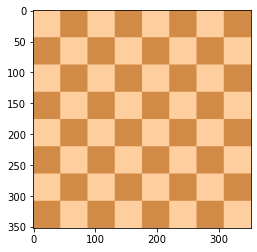

In [14]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

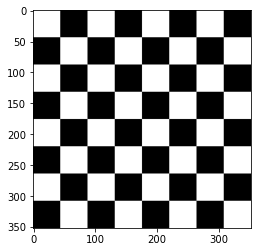

In [18]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

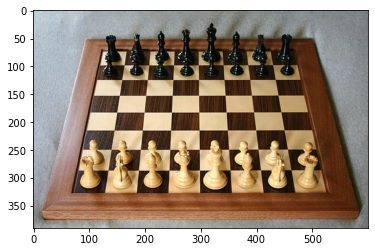

In [19]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

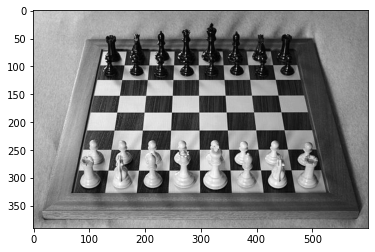

In [20]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap='gray')


In [21]:
gray_flat_chess # they are all integers and corner harris detection method requires float numbers 

array([[215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215]], dtype=uint8)

In [22]:
gray = np.float32(gray_flat_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [23]:
dst = cv2.dilate(dst, None) # just to show the resutls

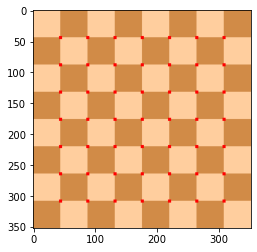

In [24]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)

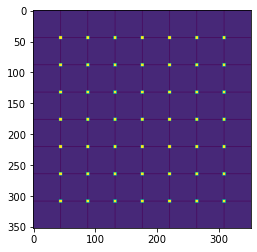

In [27]:
plt.imshow(dst)

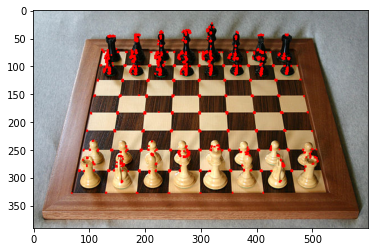

In [28]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [255, 0, 0]
plt.imshow(real_chess)

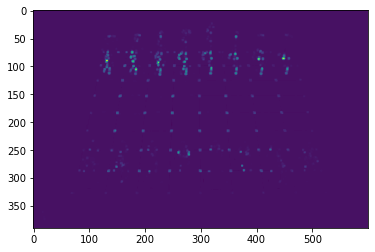

In [29]:
plt.imshow(dst)

## Shi-Tomasi corner detection

In [60]:
real_chess = cv2.imread('Data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('Data/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [61]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 10, 0.01, 10)

In [62]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]]], dtype=float32)

In [63]:
corners = np.int0(corners)

In [64]:
for i in corners:
    x, y = i.ravel() # explained below
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

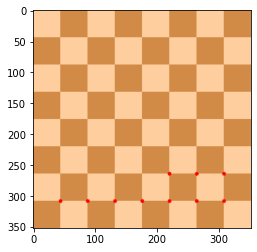

In [65]:
plt.imshow(flat_chess)

In [66]:
# ravel returns a contiguous flattened array.
for i in corners:
    print(i.ravel())

[308 308]
[264 308]
[220 308]
[176 308]
[132 308]
[ 88 308]
[ 44 308]
[308 264]
[264 264]
[220 264]


In [67]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

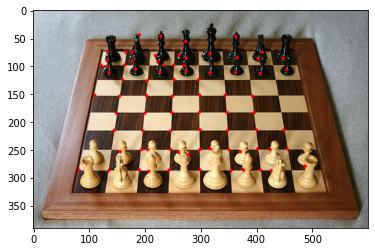

In [68]:
plt.imshow(real_chess)

# Edge detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

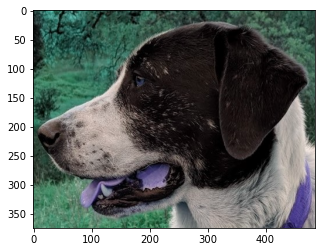

In [2]:
img = cv2.imread('DATA/sammy_face.jpg')
plt.imshow(img)

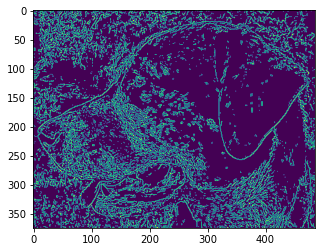

In [4]:
edges = cv2.Canny(img, threshold1=127 , threshold2=127)
plt.imshow(edges)

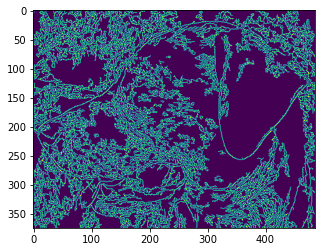

In [5]:
edges = cv2.Canny(img, threshold1=0 , threshold2=255)
plt.imshow(edges)

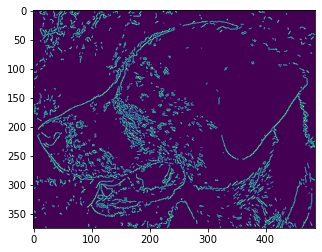

In [6]:
edges = cv2.Canny(img, threshold1=200 , threshold2=255)
plt.imshow(edges)

In [7]:
med_val = np.median(img)
med_val

64.0

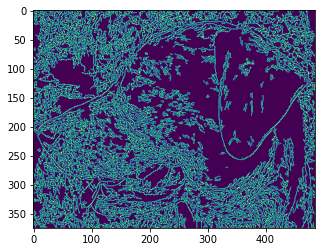

In [10]:
lower_thresh = int(max(0,0.7*med_val)) # 0 or 70% of median value, whichever bigger
upper_thresh = int(min(255, 1.3*med_val))
edges = cv2.Canny(img, threshold1=lower_thresh , threshold2=upper_thresh) # we can play around with the thershold as well
plt.imshow(edges)

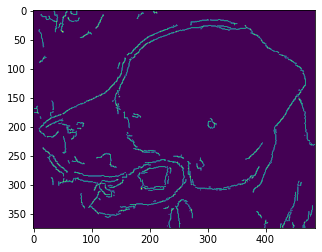

In [15]:
blurred_img = cv2.blur(img, ksize=(10,10))
edges = cv2.Canny(blurred_img, threshold1=lower_thresh , threshold2=upper_thresh)
plt.imshow(edges)

# Grid detection

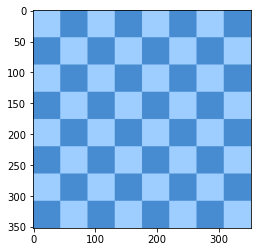

In [16]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
plt.imshow(flat_chess) 

In [17]:
# The grid should be exactly like a chessboard (i.e. used for camera calibration)
# Since the corners of the image can't be considered as part of the grid, we define grid size as (7,7) instead of (8,8)
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))
found # says if we could find corners (sometimes chess board not clear)

True

In [18]:
corners

array([[[ 43.500004,  43.500004]],

       [[ 87.5     ,  43.5     ]],

       [[131.5     ,  43.5     ]],

       [[175.5     ,  43.5     ]],

       [[219.5     ,  43.5     ]],

       [[263.5     ,  43.5     ]],

       [[307.5     ,  43.5     ]],

       [[ 43.499996,  87.50001 ]],

       [[ 87.5     ,  87.5     ]],

       [[131.5     ,  87.5     ]],

       [[175.5     ,  87.5     ]],

       [[219.5     ,  87.5     ]],

       [[263.5     ,  87.5     ]],

       [[307.5     ,  87.49999 ]],

       [[ 43.500004, 131.5     ]],

       [[ 87.5     , 131.5     ]],

       [[131.5     , 131.5     ]],

       [[175.5     , 131.5     ]],

       [[219.5     , 131.5     ]],

       [[263.5     , 131.5     ]],

       [[307.5     , 131.5     ]],

       [[ 43.499996, 175.5     ]],

       [[ 87.5     , 175.5     ]],

       [[131.5     , 175.5     ]],

       [[175.5     , 175.5     ]],

       [[219.5     , 175.5     ]],

       [[263.5     , 175.5     ]],

       [[307.5     , 175.5  

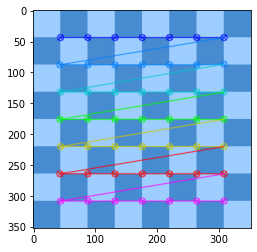

In [19]:
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)
plt.imshow(flat_chess)

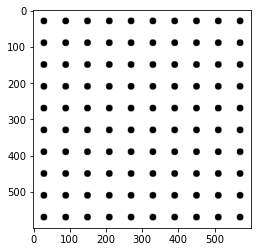

In [20]:
dots = cv2.imread('DATA/dot_grid.png')
plt.imshow(dots)

In [21]:
found, corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)
found

True

In [22]:
corners

array([[[ 29.5,  29.5]],

       [[ 89.5,  29.5]],

       [[149.5,  29.5]],

       [[209.5,  29.5]],

       [[269.5,  29.5]],

       [[329.5,  29.5]],

       [[389.5,  29.5]],

       [[449.5,  29.5]],

       [[509.5,  29.5]],

       [[569.5,  29.5]],

       [[ 29.5,  89.5]],

       [[ 89.5,  89.5]],

       [[149.5,  89.5]],

       [[209.5,  89.5]],

       [[269.5,  89.5]],

       [[329.5,  89.5]],

       [[389.5,  89.5]],

       [[449.5,  89.5]],

       [[509.5,  89.5]],

       [[569.5,  89.5]],

       [[ 29.5, 149.5]],

       [[ 89.5, 149.5]],

       [[149.5, 149.5]],

       [[209.5, 149.5]],

       [[269.5, 149.5]],

       [[329.5, 149.5]],

       [[389.5, 149.5]],

       [[449.5, 149.5]],

       [[509.5, 149.5]],

       [[569.5, 149.5]],

       [[ 29.5, 209.5]],

       [[ 89.5, 209.5]],

       [[149.5, 209.5]],

       [[209.5, 209.5]],

       [[269.5, 209.5]],

       [[329.5, 209.5]],

       [[389.5, 209.5]],

       [[449.5, 209.5]],

       [[509

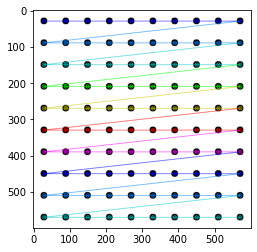

In [23]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)
plt.imshow(dots)

# Contour detection

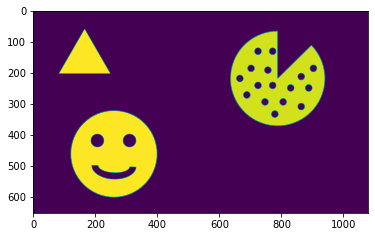

In [29]:
img = cv2.imread('DATA/internal_external.png', 0)
plt.imshow(img)

In [31]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [32]:
type(contours)

tuple

In [33]:
len(contours) # we have 22 contours total in this image

22

In [39]:
contours

(array([[[247, 322]],
 
        [[246, 323]],
 
        [[240, 323]],
 
        [[239, 324]],
 
        [[233, 324]],
 
        [[232, 325]],
 
        [[229, 325]],
 
        [[228, 326]],
 
        [[225, 326]],
 
        [[224, 327]],
 
        [[221, 327]],
 
        [[220, 328]],
 
        [[218, 328]],
 
        [[217, 329]],
 
        [[215, 329]],
 
        [[214, 330]],
 
        [[213, 330]],
 
        [[212, 331]],
 
        [[210, 331]],
 
        [[209, 332]],
 
        [[207, 332]],
 
        [[206, 333]],
 
        [[205, 333]],
 
        [[204, 334]],
 
        [[203, 334]],
 
        [[202, 335]],
 
        [[201, 335]],
 
        [[200, 336]],
 
        [[198, 336]],
 
        [[197, 337]],
 
        [[196, 337]],
 
        [[195, 338]],
 
        [[194, 338]],
 
        [[192, 340]],
 
        [[191, 340]],
 
        [[190, 341]],
 
        [[189, 341]],
 
        [[187, 343]],
 
        [[186, 343]],
 
        [[185, 344]],
 
        [[184, 344]],
 
        [[182, 3

In [38]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [46]:
external = np.zeros(img.shape)
internal = np.zeros(img.shape)
temp1 = np.zeros(img.shape)
temp2 = np.zeros(img.shape)

In [49]:
for i in range(len(contours)):
    # external contour
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external, contours, i, 255, -1)
    # Interal contours
    elif hierarchy[0][i][3] != -1:
        cv2.drawContours(internal, contours, i, 255, -1)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == 0:
        cv2.drawContours(temp1, contours, i, 255, -1)
    
    elif hierarchy[0][i][3] == 4:
        cv2.drawContours(temp2, contours, i, 255, -1)


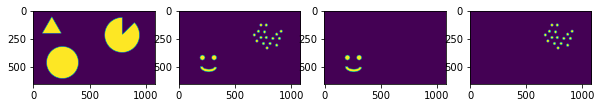

In [54]:
plt.figure(1, (10,20));

plt.subplot(141)
plt.imshow(external)

plt.subplot(142)
plt.imshow(internal)

plt.subplot(143)
plt.imshow(temp1)

plt.subplot(144)
plt.imshow(temp2);

# Feature matching

In [6]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

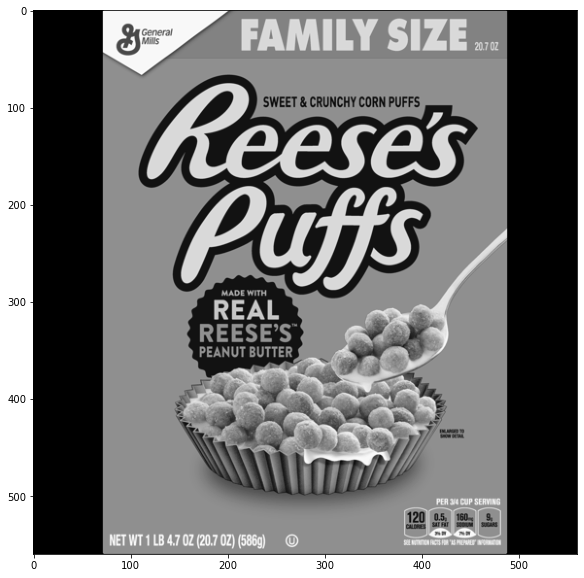

In [7]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)
display(reeses)

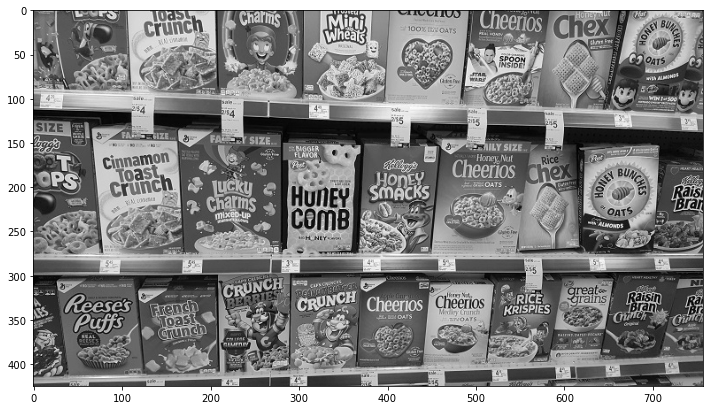

In [8]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)
display(cereals)

## Brute-Force matching

In [59]:
orb = cv2.ORB_create() # crate ORB object
# We can see that keypoints are present around the eyes, lips and nose. 
# we can use the keypoint and its surround pixel area to create a numerical 
# feature that can be called a feature descriptor. 
# ORB uses the BRIEF algorithm which stands for Binary Robust Independent Elementary Features.
kp1, des1 = orb.detectAndCompute(reeses, None)

kp2, des2 = orb.detectAndCompute(cereals, None)

In [63]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

In [65]:
single_match = matches[0]
single_match.distance # smaller distance: better match

58.0

In [69]:
len(matches)

138

In [68]:
matches = sorted(matches, key=lambda x:x.distance)

In [71]:
reeses_matched = reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

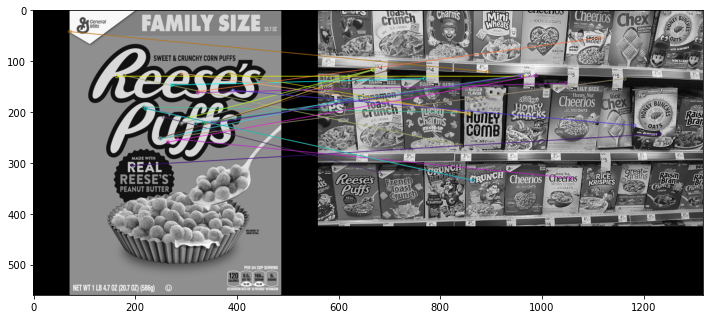

In [72]:
display(reeses_matches)

In [75]:
des1.shape

(500, 32)

In [76]:
reeses.shape

(560, 560)

## SIFT descriptor
(Scale-Invariant Feature Transform). We can use it when two images are very different sizes

In [3]:
sift = cv2.SIFT_create()

In [9]:
kp1, des1 = sift.detectAndCompute(reeses, None)

kp2, des2 = sift.detectAndCompute(cereals, None)

In [20]:
len(kp1)

1501

In [25]:
kp1

(<KeyPoint 0x7fc7b5fe72d0>,
 <KeyPoint 0x7fc7b5feec00>,
 <KeyPoint 0x7fc7b252dae0>,
 <KeyPoint 0x7fc7b5fe1870>,
 <KeyPoint 0x7fc7b5fe18a0>,
 <KeyPoint 0x7fc7b5fce420>,
 <KeyPoint 0x7fc7b5fce120>,
 <KeyPoint 0x7fc7b5fb81e0>,
 <KeyPoint 0x7fc7b5fb8240>,
 <KeyPoint 0x7fc7b5fb8270>,
 <KeyPoint 0x7fc7b5fb8150>,
 <KeyPoint 0x7fc7b5fafe40>,
 <KeyPoint 0x7fc7b5fafd80>,
 <KeyPoint 0x7fc7b2552840>,
 <KeyPoint 0x7fc7b2552330>,
 <KeyPoint 0x7fc7b2552ab0>,
 <KeyPoint 0x7fc7b5ff0d80>,
 <KeyPoint 0x7fc7b5f9e510>,
 <KeyPoint 0x7fc7b5f9ed80>,
 <KeyPoint 0x7fc7b5f9ebd0>,
 <KeyPoint 0x7fc7b5ff5e40>,
 <KeyPoint 0x7fc7b5ff5d80>,
 <KeyPoint 0x7fc7b5ff5ae0>,
 <KeyPoint 0x7fc7b5ff5870>,
 <KeyPoint 0x7fc7b5ff57e0>,
 <KeyPoint 0x7fc7b5ff5900>,
 <KeyPoint 0x7fc7b5ff5960>,
 <KeyPoint 0x7fc7b5ff5a80>,
 <KeyPoint 0x7fc7b5ff5ab0>,
 <KeyPoint 0x7fc7b5feca20>,
 <KeyPoint 0x7fc7b5fecc60>,
 <KeyPoint 0x7fc7b5fec840>,
 <KeyPoint 0x7fc7b5fec750>,
 <KeyPoint 0x7fc7b5fec720>,
 <KeyPoint 0x7fc7b5fec7b0>,
 <KeyPoint 0x7fc7b5f

In [19]:
len(kp2)

3744

In [10]:
bf = cv2.BFMatcher()

In [11]:
matches = bf.knnMatch(des1, des2, k=2) # matches will have k columns

In [16]:
len(matches) # if match in col 1 is in sall distance to match in col 2, that is a good match

1501

In [26]:
good = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [28]:
len(good) # we threw away a lot of matches

79

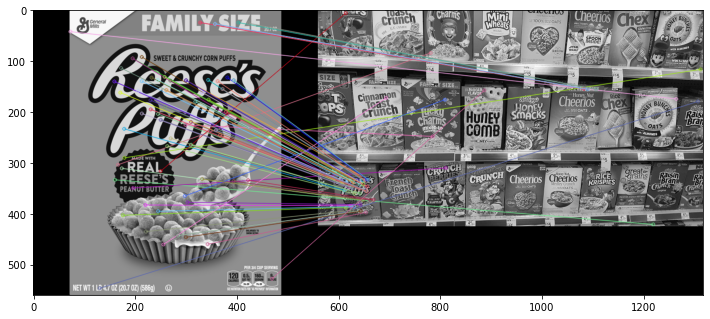

In [29]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

## FLANN based Matcher
FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets. It is much faster than BFMatcher but ususally finds the general good matches.

In [48]:
sift = cv2.SIFT_create()

In [49]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [50]:
FLAN_IND_KDTREE = 0
ind_params = dict(algorithm=FLAN_IND_KDTREE, trees=5)
search_params = dict(checks=50) # = {'checks': 50}

In [51]:
flann = cv2.FlannBasedMatcher(ind_params, search_params)

In [52]:
matches = flann.knnMatch(des1, des2, k=2)

In [46]:
good = []
for match1, match2 in matches:
    
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

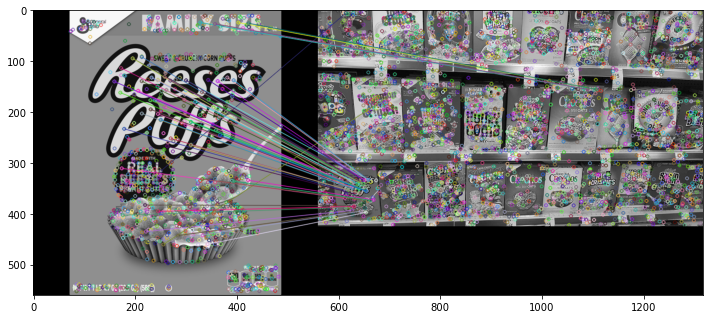

In [47]:
# flags=0: draws all the features matched on and draw lines on the ones it thinks they are good
# flags=2: only draws lines
flann_matches = cv2.drawMatchesKnn(reeses,kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

To see the lines and feature dots in 2 differnt colors:

In [59]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

FLAN_IND_KDTREE = 0
ind_params = dict(algorithm=FLAN_IND_KDTREE, trees=5)
search_params = dict(checks=50) # = {'checks': 50}

flann = cv2.FlannBasedMatcher(ind_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

In [60]:
for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0] #we add 1 to where there's good match (shown as lines in final draw image)
        # 0 elsewhere which are shown as dots in the last draw image

In [61]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

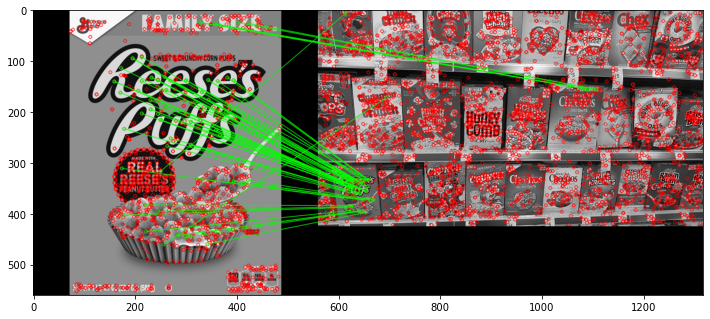

In [62]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)